In [68]:
import pandas as pd
import os  

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

pd.set_option('display.max_columns', None)

In [69]:
start_date = '2014-03-01'
end_date = '2025-03-10'

In [70]:
data_path = os.path.join('..', 'data', f'nvidia_data_{start_date}_{end_date}')
raw_data = pd.read_csv(data_path, parse_dates= ['Date'])

In [71]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2772 non-null   datetime64[ns]
 1   Close_NVDA    2772 non-null   float64       
 2   Close_QQQ     2772 non-null   float64       
 3   Close_SMH     2772 non-null   float64       
 4   Close_SOXX    2772 non-null   float64       
 5   Close_XSD     2772 non-null   float64       
 6   Close_^DJI    2772 non-null   float64       
 7   Close_^GSPC   2772 non-null   float64       
 8   Close_^IXIC   2772 non-null   float64       
 9   Close_^VIX    2772 non-null   float64       
 10  High_NVDA     2772 non-null   float64       
 11  High_QQQ      2772 non-null   float64       
 12  High_SMH      2772 non-null   float64       
 13  High_SOXX     2772 non-null   float64       
 14  High_XSD      2772 non-null   float64       
 15  High_^DJI     2772 non-null   float64 

## Valores nulos
Solo hay valores nulos para los indicadores tecnicos calculados pero se debe a que tienen una ventana temporal para ser caculados, al no tener los datos anteriores a los primeros datos del dataframe estos no se calculan por lo que podemos simplemente botar estos datos.

In [72]:
data = raw_data.dropna()

In [73]:
print(data.shape)
data.isna().sum()

(2739, 58)


Date            0
Close_NVDA      0
Close_QQQ       0
Close_SMH       0
Close_SOXX      0
Close_XSD       0
Close_^DJI      0
Close_^GSPC     0
Close_^IXIC     0
Close_^VIX      0
High_NVDA       0
High_QQQ        0
High_SMH        0
High_SOXX       0
High_XSD        0
High_^DJI       0
High_^GSPC      0
High_^IXIC      0
High_^VIX       0
Low_NVDA        0
Low_QQQ         0
Low_SMH         0
Low_SOXX        0
Low_XSD         0
Low_^DJI        0
Low_^GSPC       0
Low_^IXIC       0
Low_^VIX        0
Open_NVDA       0
Open_QQQ        0
Open_SMH        0
Open_SOXX       0
Open_XSD        0
Open_^DJI       0
Open_^GSPC      0
Open_^IXIC      0
Open_^VIX       0
Volume_NVDA     0
Volume_QQQ      0
Volume_SMH      0
Volume_SOXX     0
Volume_XSD      0
Volume_^DJI     0
Volume_^GSPC    0
Volume_^IXIC    0
Volume_^VIX     0
rsi             0
macd            0
macd_signal     0
macd_diff       0
bb_mavg         0
bb_high         0
bb_low          0
stoch_k         0
stoch_d         0
Year      

La columna Volume_^VIX no aporta ningun tipo de información por lo que podemos eliminarla

In [74]:
drop_cols = ['Volume_^VIX']
data = data.drop(columns= drop_cols)

## Correlaciones 

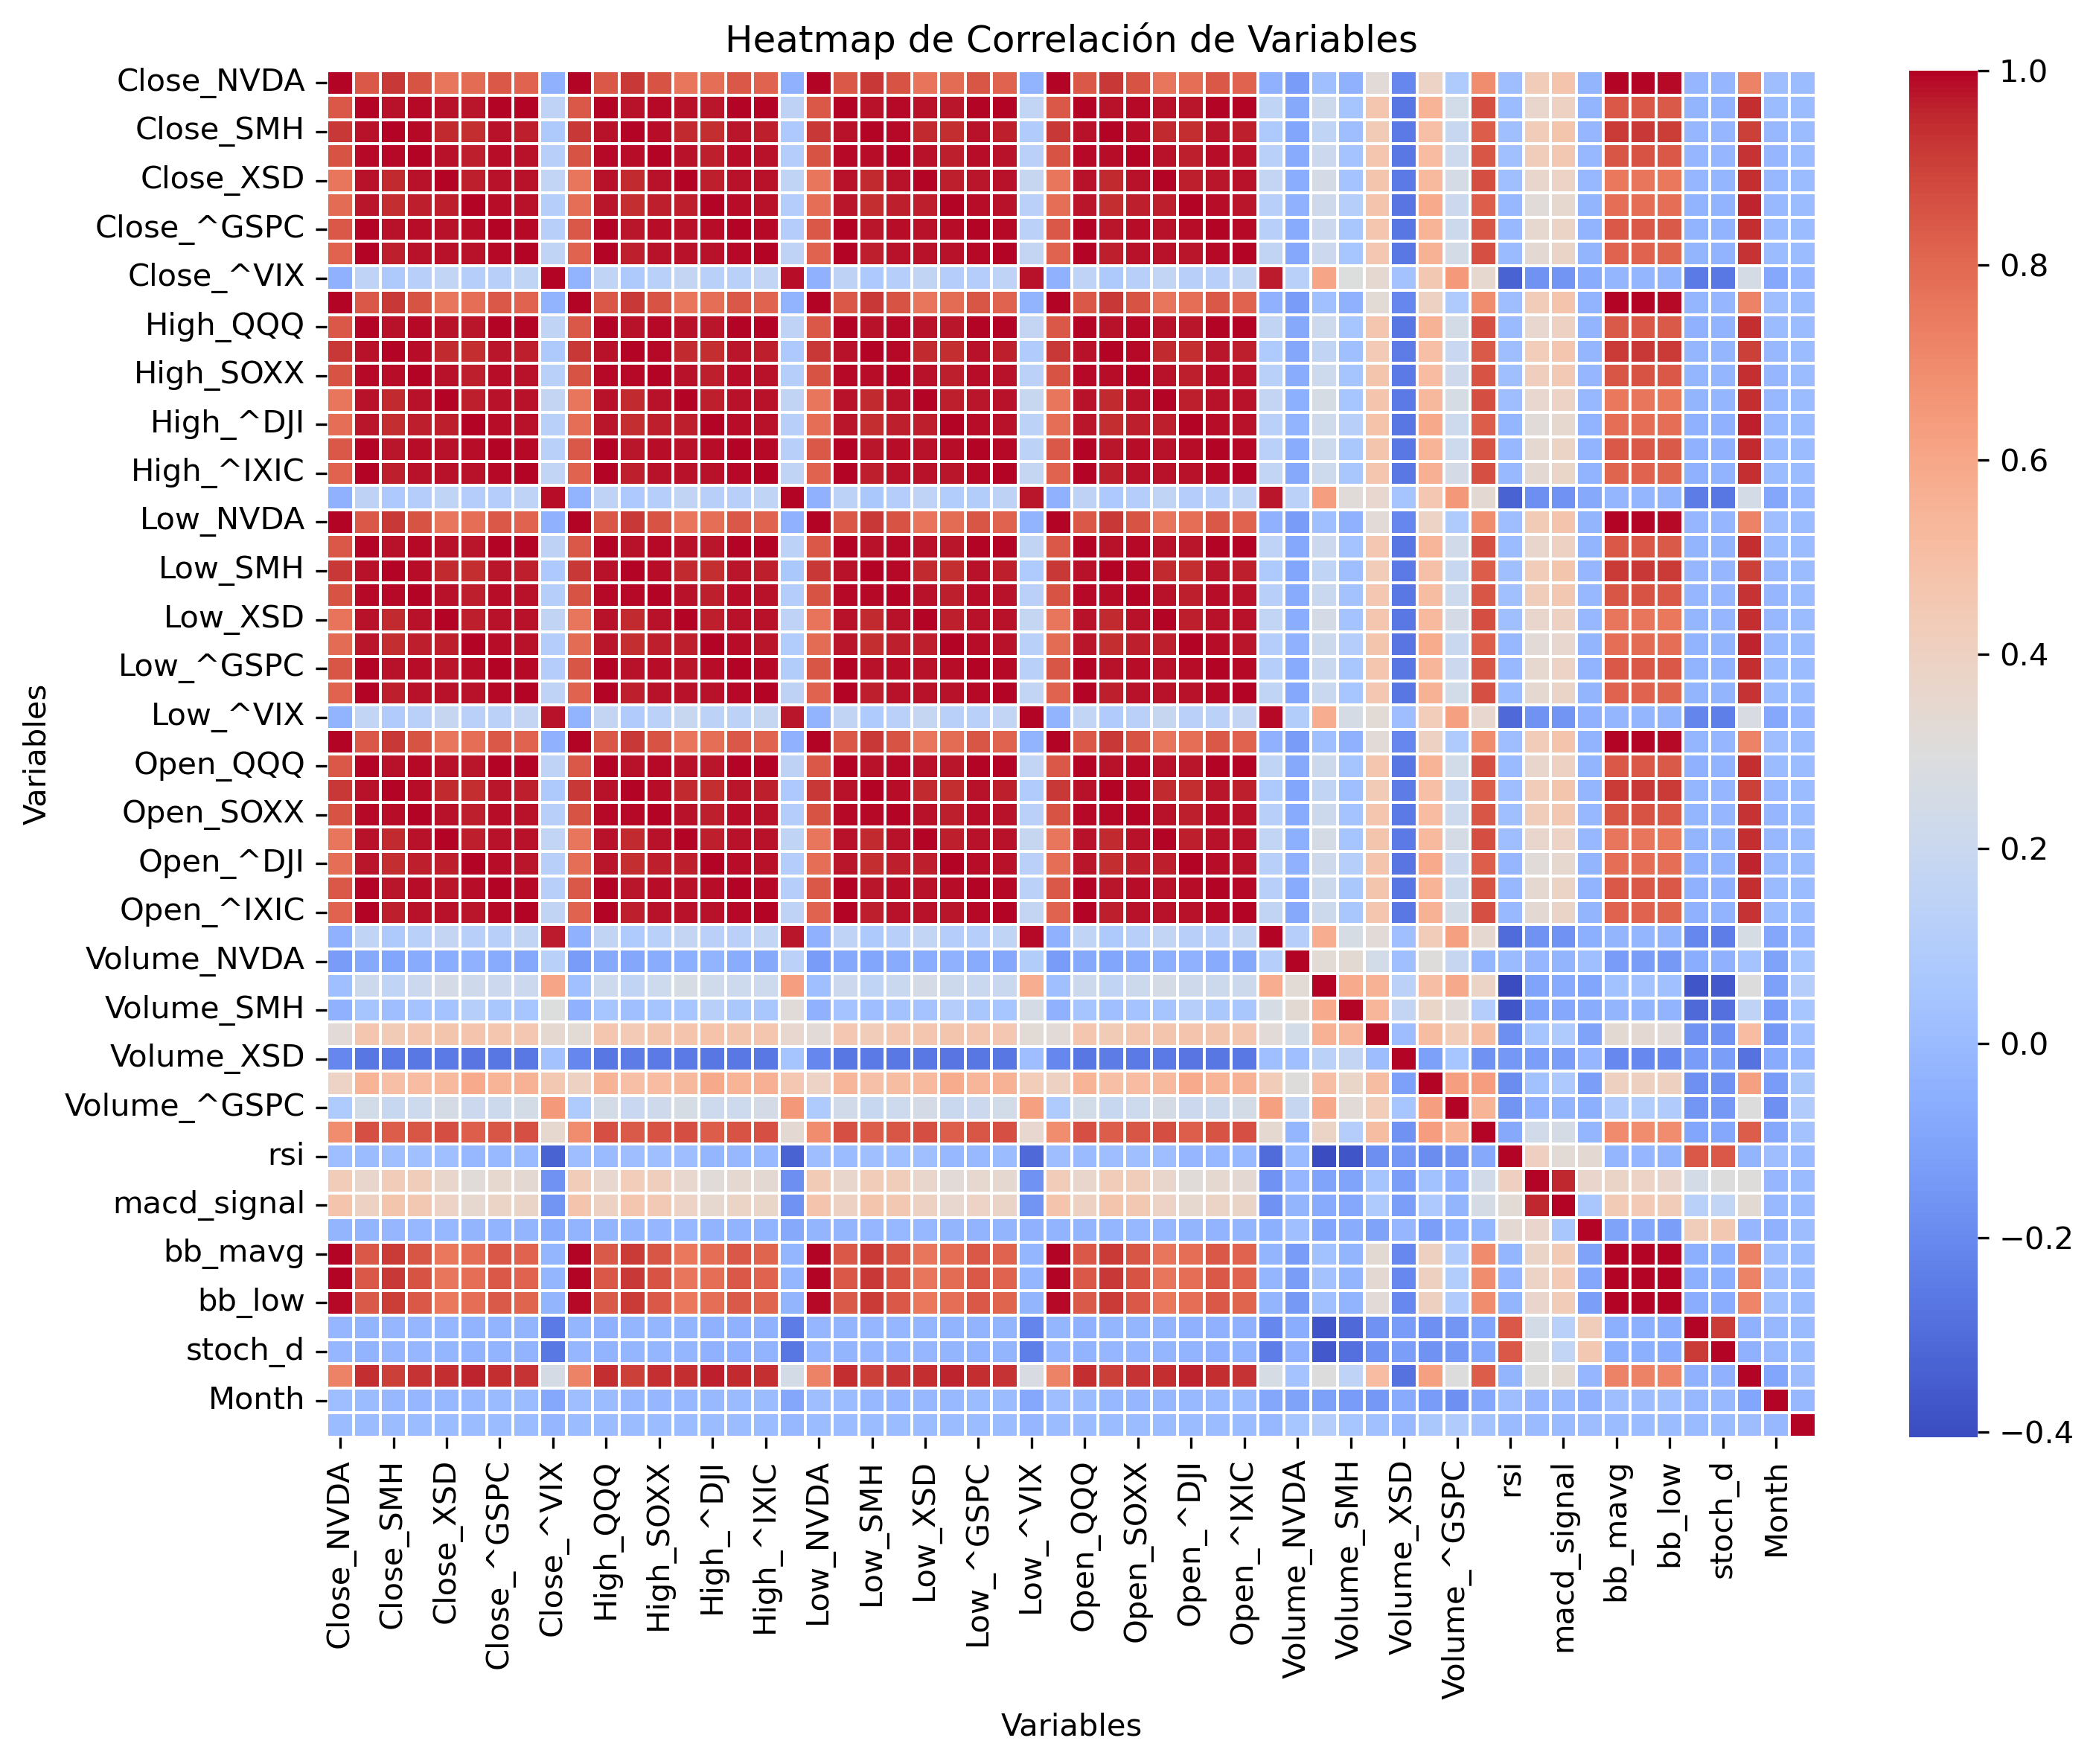

In [76]:
corr_matrix = data.drop(columns= ['Date']).corr() 
plt.figure(figsize=(10,8), dpi= 300)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación de Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

## Reducir la multicolinealidad
Podemos botar el high y el low de NVDA ya que calculamos las bandas de 

In [77]:
corr_matrix = data.corr().abs()
upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper = corr_matrix.where(upper_triangle_mask)
threshold = 0.95
to_drop = [
    column 
    for column in upper.columns 
    if any(upper[column] > threshold)
]


print("Columnas con correlación > 0.95 (o < -0.95):", to_drop)

data_reduced = data.drop(columns=to_drop)

Columnas con correlación > 0.95 (o < -0.95): ['Close_SMH', 'Close_SOXX', 'Close_XSD', 'Close_^DJI', 'Close_^GSPC', 'Close_^IXIC', 'High_NVDA', 'High_QQQ', 'High_SMH', 'High_SOXX', 'High_XSD', 'High_^DJI', 'High_^GSPC', 'High_^IXIC', 'High_^VIX', 'Low_NVDA', 'Low_QQQ', 'Low_SMH', 'Low_SOXX', 'Low_XSD', 'Low_^DJI', 'Low_^GSPC', 'Low_^IXIC', 'Low_^VIX', 'Open_NVDA', 'Open_QQQ', 'Open_SMH', 'Open_SOXX', 'Open_XSD', 'Open_^DJI', 'Open_^GSPC', 'Open_^IXIC', 'Open_^VIX', 'macd_signal', 'bb_mavg', 'bb_high', 'bb_low', 'Year']


In [78]:
data_reduced.columns

Index(['Date', 'Close_NVDA', 'Close_QQQ', 'Close_^VIX', 'Volume_NVDA',
       'Volume_QQQ', 'Volume_SMH', 'Volume_SOXX', 'Volume_XSD', 'Volume_^DJI',
       'Volume_^GSPC', 'Volume_^IXIC', 'rsi', 'macd', 'macd_diff', 'stoch_k',
       'stoch_d', 'Month', 'Dayofweek'],
      dtype='object')

Por el momento utilizaremos solo estas columnas pero no botaremos los precios de cierre de los otros activos hasta que hayamos verificado por un metodo mas robusto de feature selection que debemos botar estas columnas

In [79]:
keep_cols = ['Date', 'Close_NVDA', 'Close_QQQ', 'Close_^VIX','Volume_NVDA',
       'Close_SMH', 'Close_SOXX', 'Close_XSD', 'Close_^DJI', 'Close_^GSPC', 'Close_^IXIC',
       'Volume_QQQ', 'Volume_SMH', 'Volume_SOXX', 'Volume_XSD', 'Volume_^DJI',
       'Volume_^GSPC', 'Volume_^IXIC', 'rsi', 'macd', 'macd_diff', 'stoch_k',
       'stoch_d', 'Month', 'Dayofweek']
data = raw_data[keep_cols]

## Skewness de las variables

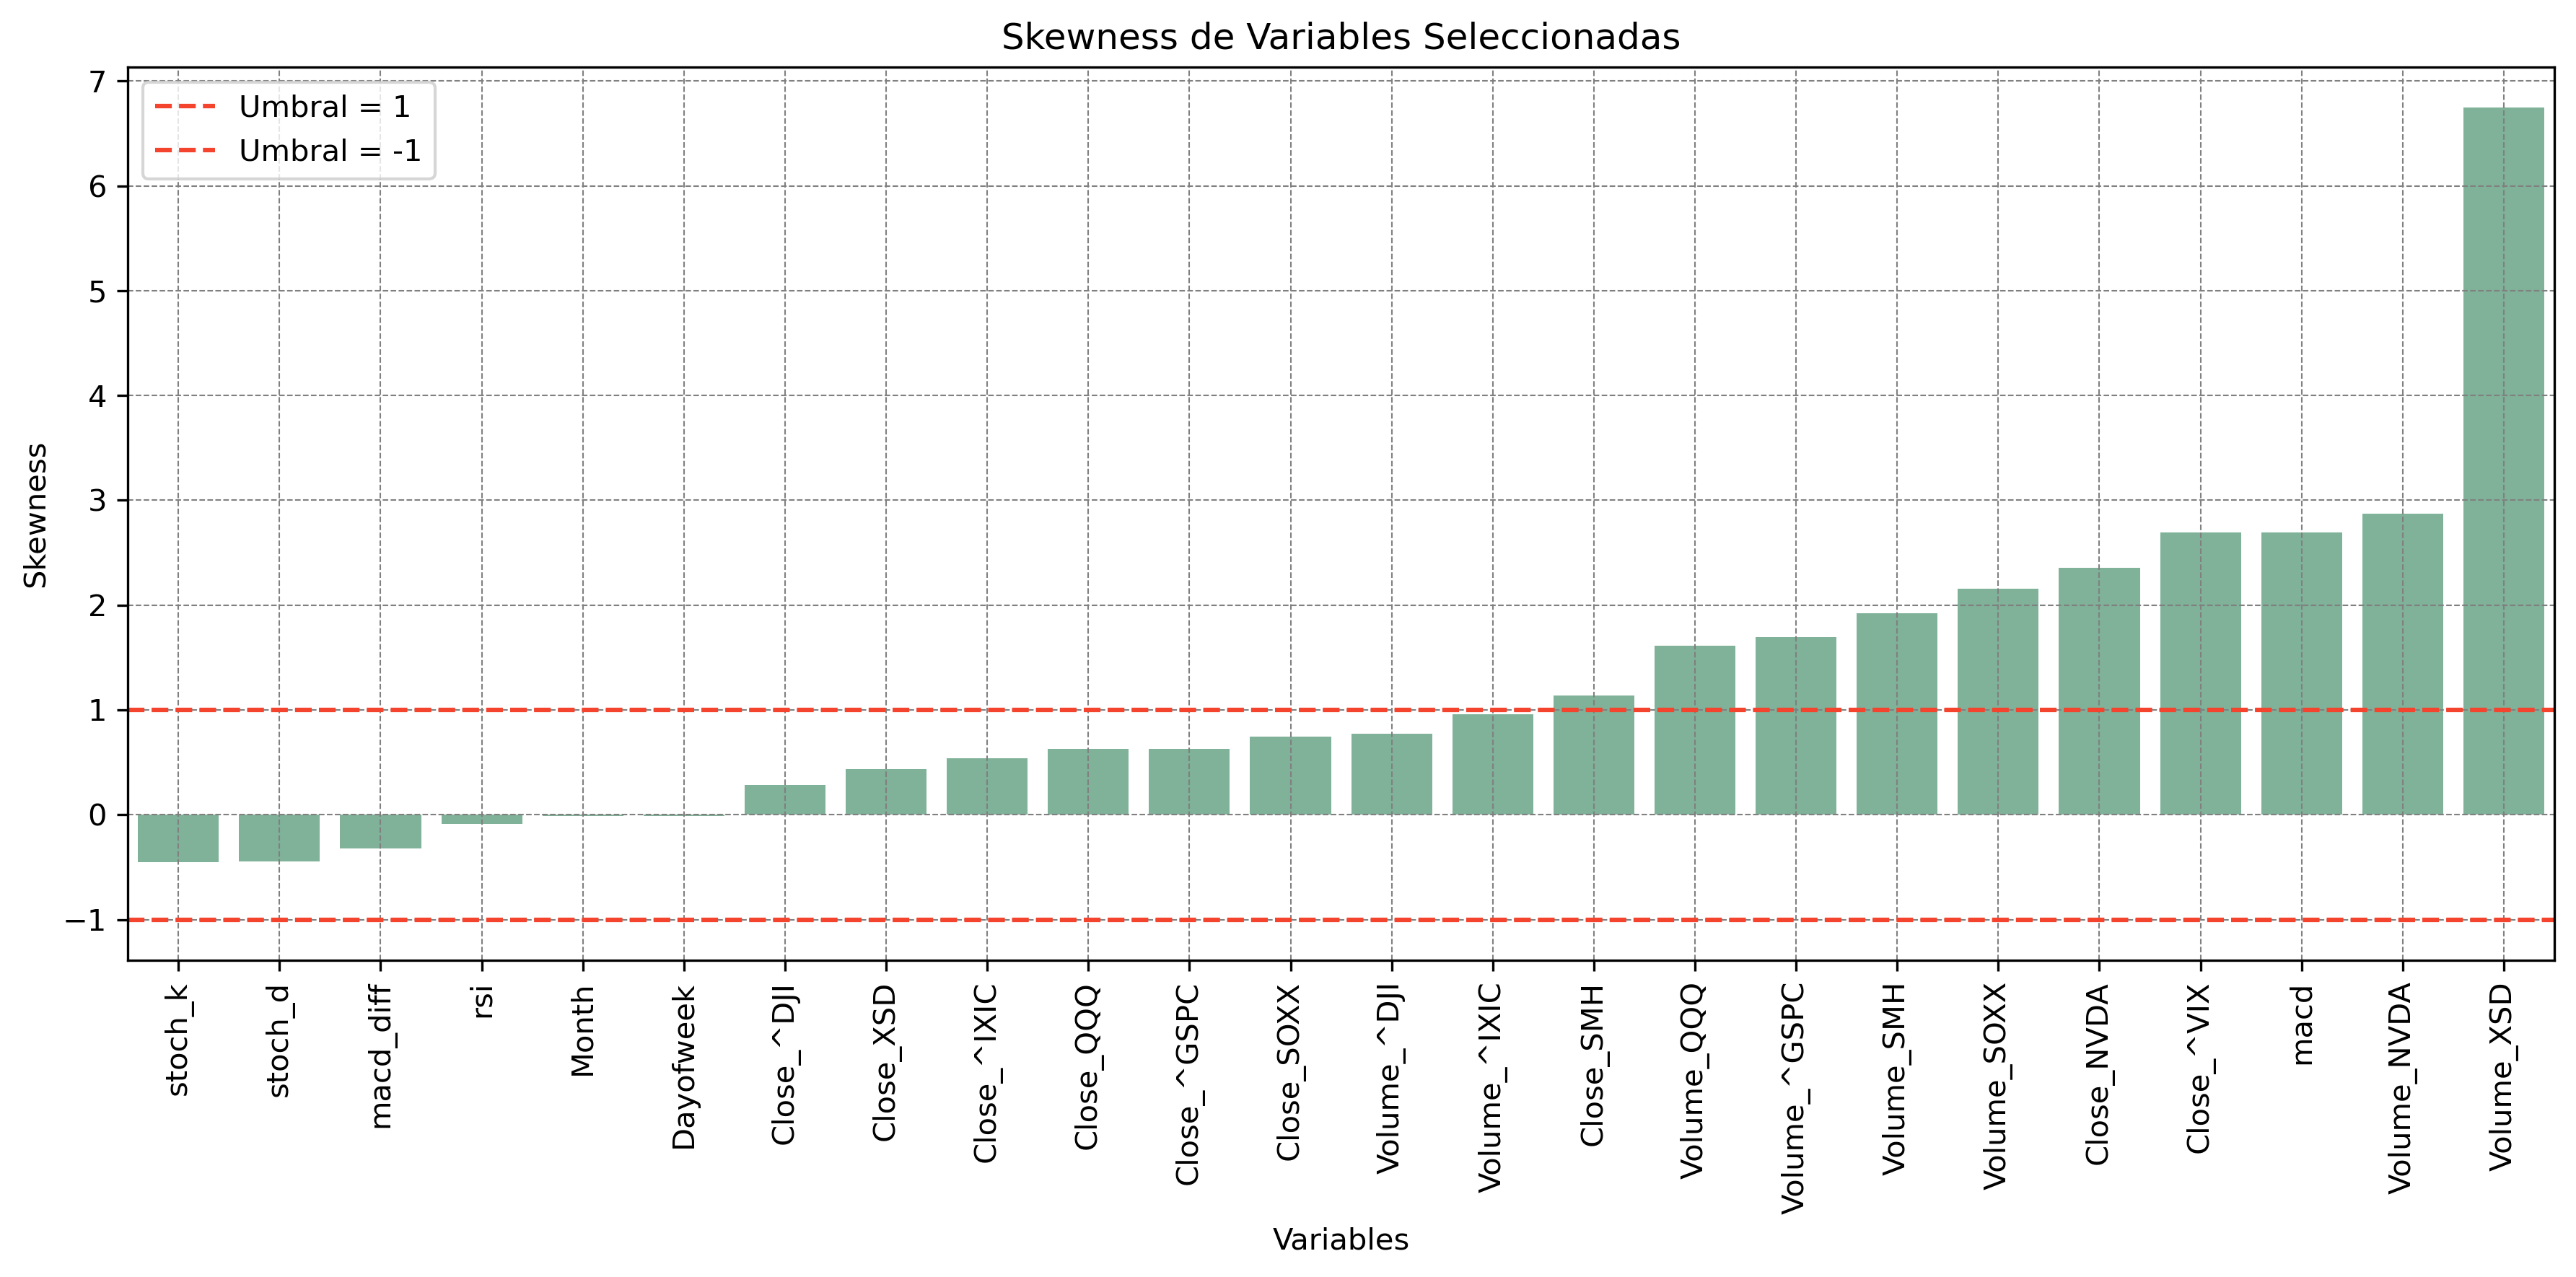

In [80]:
skew_values = data.drop(columns= ['Date']).skew().sort_values()
plt.figure(figsize=(12, 6), dpi = 300)
sns.barplot(x=skew_values.index, y=skew_values.values, color='#77BA99')

plt.axhline(1, color='#F4442E', linestyle='--', label='Umbral = 1')
plt.axhline(-1, color='#F4442E', linestyle='--', label='Umbral = -1')

plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.title('Skewness de Variables Seleccionadas')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()

plt.show()

Muchos de los volumenes estan altamente sesgados al tener una alta asimetria y algunas acciones tambien por lo que lo mejor es apliacr una transformación para evitar sesgod del modelo.

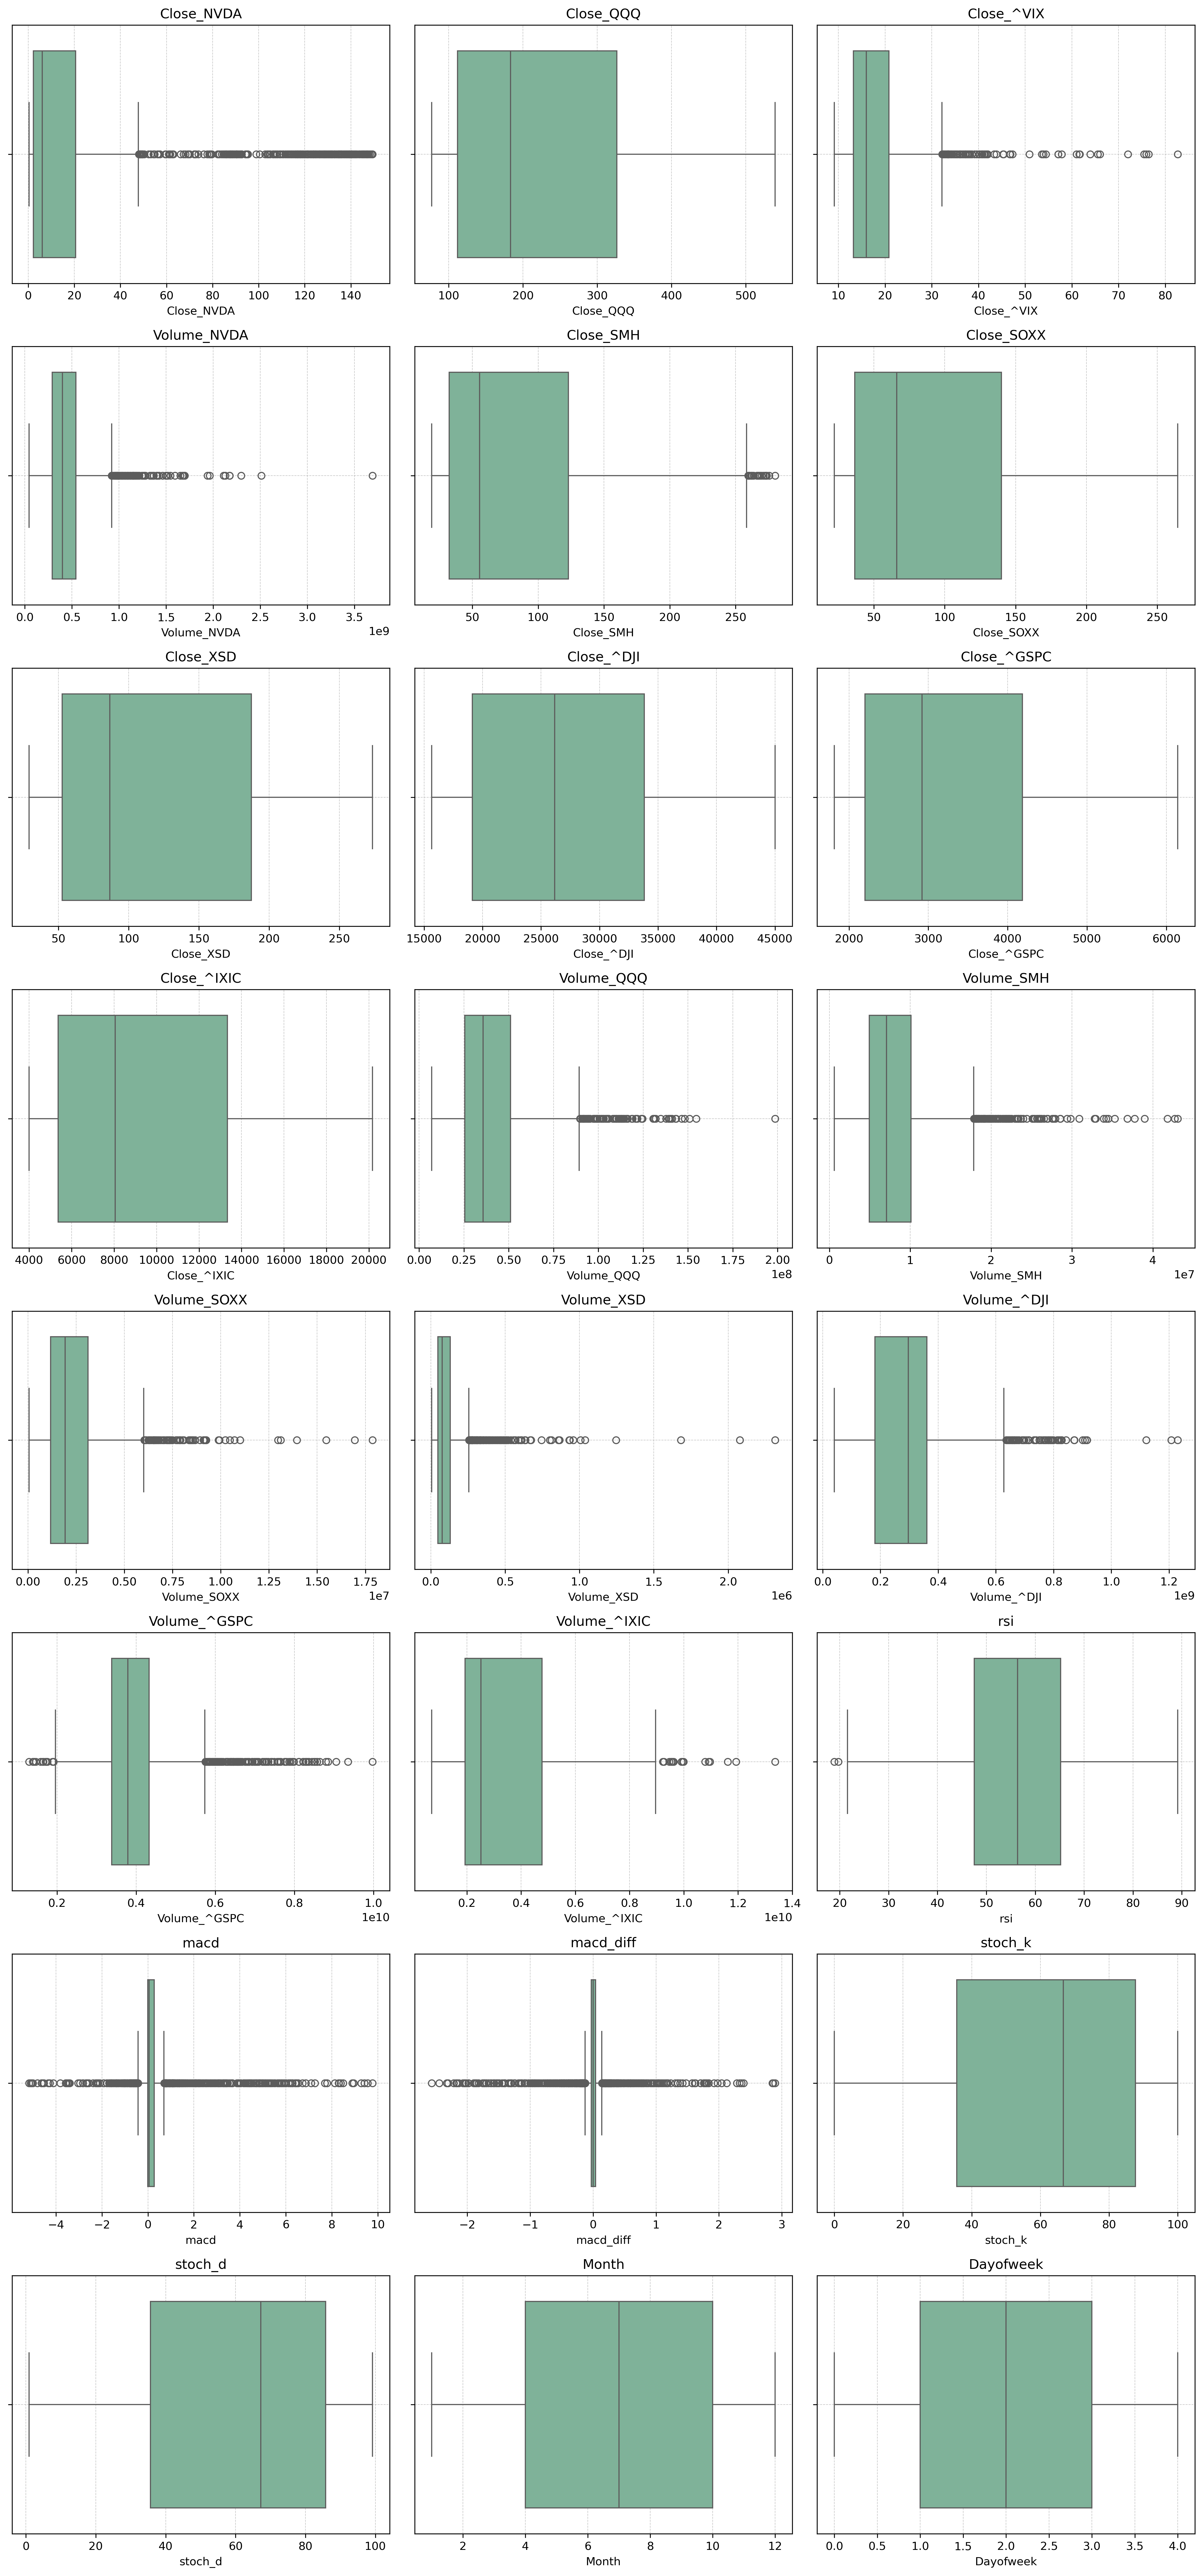

In [84]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

ncols = 3 
nrows = (len(numerical_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4), dpi = 300)
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i], color='#77BA99')
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()